In [1]:
#ebelin 9.5

from sympy import *
init_session()
from sympy.stats import *
import matplotlib.pyplot as plt
import numpy as np

F, a, b, R, mttf, l =symbols('F a b R mttf l')

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
Fext=1-exp(-0.008*t)
Fwear=1-exp(-(t/10)**1.8) #characteristic life of 10y, shape 1.8, designed for 5 years.
Rext=1-Fext
Rwear=1-Fwear
Rsys=Rext*Rwear
Rsys.subs({t:5}) #confiabilidade do sistema.


In [8]:
#determine o periodo de manutenção que providenciará uma confiabilidade de 0.95
R=0
t1=5
T=5
n=t1//T
while R<0.95:
    T=T-(0.001)
    n=t1//T
    a=Rext.subs({t:t1})
    b=Rwear.subs({t:(t1-T)})
    R=N(a*(Rwear.subs({t:T})**n)*Rwear.subs({t:(t1-n*T)}),4)
    print('{}  manutenções - {} confiabilidade'.format(n,R))


1.0  manutenções - 0.7210 confiabilidade
1.0  manutenções - 0.7211 confiabilidade
1.0  manutenções - 0.7212 confiabilidade
1.0  manutenções - 0.7213 confiabilidade
1.0  manutenções - 0.7213 confiabilidade
1.0  manutenções - 0.7214 confiabilidade
1.0  manutenções - 0.7215 confiabilidade
1.0  manutenções - 0.7215 confiabilidade
1.0  manutenções - 0.7216 confiabilidade
1.0  manutenções - 0.7217 confiabilidade
1.0  manutenções - 0.7218 confiabilidade
1.0  manutenções - 0.7218 confiabilidade
1.0  manutenções - 0.7219 confiabilidade
1.0  manutenções - 0.7220 confiabilidade
1.0  manutenções - 0.7221 confiabilidade
1.0  manutenções - 0.7221 confiabilidade
1.0  manutenções - 0.7222 confiabilidade
1.0  manutenções - 0.7223 confiabilidade
1.0  manutenções - 0.7224 confiabilidade
1.0  manutenções - 0.7224 confiabilidade
1.0  manutenções - 0.7225 confiabilidade
1.0  manutenções - 0.7226 confiabilidade
1.0  manutenções - 0.7227 confiabilidade
1.0  manutenções - 0.7227 confiabilidade
1.0  manutenções

In [9]:
T

In [4]:
'{} manutenções'.format(n)

'57.0 manutenções'

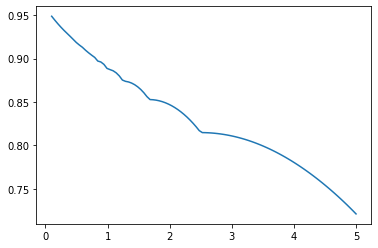

In [5]:
k=np.linspace(0.1,5,100)
def predict(Tk):
    n=t1//Tk
    return N((Rsys.subs({t:Tk})**n)*Rsys.subs({t:(t1-n*Tk)}),4)
predict_v=np.vectorize(predict)
plt.plot(k,predict_v(k))

In [6]:
#if there is a 0.005 probability of maintenance causing a failure, will the interval need to be adjusted to provide the desired 0.95 reliability?
R=0
t1=5
T=5
Fm=0.005
n=t1//T
while R<0.95:
    T=T-(0.001)
    n=t1//T
    a=Rext.subs({t:t1})
    b=Rwear.subs({t:(t1-T)})
    R=N(a*(Rwear.subs({t:T})**n)*Rwear.subs({t:(t1-n*T)})*(1-Fm)**n,4)
    print('{}  manutenções - {} confiabilidade'.format(n,R))

1.0  manutenções - 0.7174 confiabilidade
1.0  manutenções - 0.7175 confiabilidade
1.0  manutenções - 0.7176 confiabilidade
1.0  manutenções - 0.7177 confiabilidade
1.0  manutenções - 0.7177 confiabilidade
1.0  manutenções - 0.7178 confiabilidade
1.0  manutenções - 0.7179 confiabilidade
1.0  manutenções - 0.7179 confiabilidade
1.0  manutenções - 0.7180 confiabilidade
1.0  manutenções - 0.7181 confiabilidade
1.0  manutenções - 0.7182 confiabilidade
1.0  manutenções - 0.7182 confiabilidade
1.0  manutenções - 0.7183 confiabilidade
1.0  manutenções - 0.7184 confiabilidade
1.0  manutenções - 0.7185 confiabilidade
1.0  manutenções - 0.7185 confiabilidade
1.0  manutenções - 0.7186 confiabilidade
1.0  manutenções - 0.7187 confiabilidade
1.0  manutenções - 0.7188 confiabilidade
1.0  manutenções - 0.7188 confiabilidade
1.0  manutenções - 0.7189 confiabilidade
1.0  manutenções - 0.7190 confiabilidade
1.0  manutenções - 0.7190 confiabilidade
1.0  manutenções - 0.7191 confiabilidade
1.0  manutenções

OverflowError: (34, 'Result too large')

In [ ]:
#não foi possível alcançar 0.95 de confiabilidade com essa probabilidade de falha causada pela manutenção.